
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dapivei/causal-infere/blob/main/sections/2_Probability_1-2.ipynb)

</div>


# Probability 


## Probability Mass and Density Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pmf_die(x):
    """
    Probability Mass Function
    for a fair six-sided die.
    """
    if x in [1, 2, 3, 4, 5, 6]:
        return 1/6
    else:
        return 0

def pdf_gaussian(x, mu, sigma):
    """Probability Density Function
    for a Gaussian distribution.
    """
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

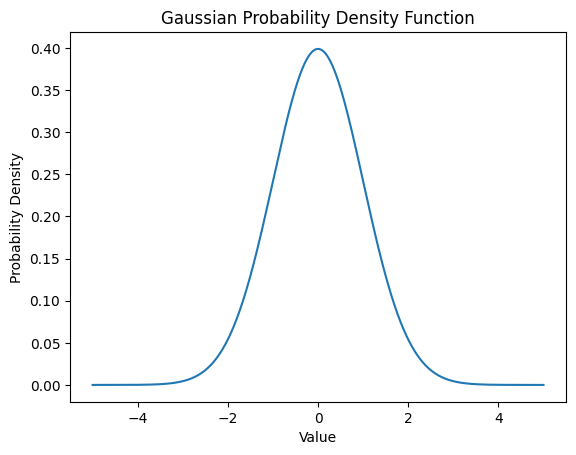

In [3]:
x = np.linspace(-5, 5, 1000)
y = pdf_gaussian(x, 0, 1)
plt.plot(x, y)
plt.title('Gaussian Probability Density Function')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()
x = np.linspace(-5, 5, 1000)


In [4]:
y = pdf_gaussian(x, 0, 1)
y = np.cumsum(y, axis=0)
print(f"Final cumulative value: {y[-1]}")

Final cumulative value: 99.89994420133425


Final cumulative value: 1.0000000000000007


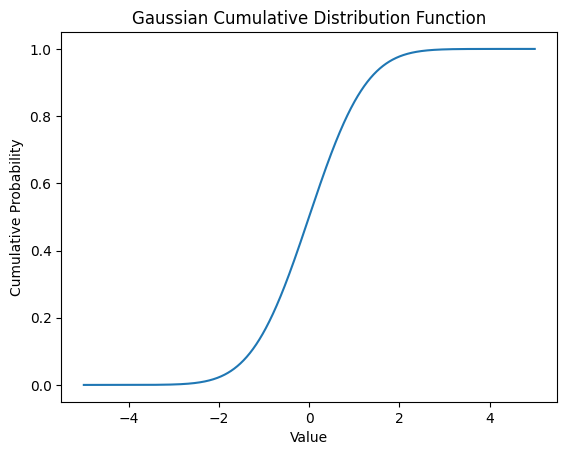

In [5]:
# Calculate PDF
y = pdf_gaussian(x, 0, 1)

# Calculate CDF by cumulative sum and normalize
y_cdf = np.cumsum(y) / np.sum(y)

print(f"Final cumulative value: {y_cdf[-1]}")

# Plot CDF
plt.plot(x, y_cdf)
plt.title('Gaussian Cumulative Distribution Function')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.show()

## Function of random variables

\begin{align}
E[g(X)]=\int_{-\infty}^{\infty} g(x) f(x) d x
\end{align}

## Variance

\begin{align}
E\left[(X-E[X])^2\right] & =E\left[X^2-2 X E[X]+E[X]^2\right] \\
& =E\left[X^2\right]-E[2 X E[X]]+E[X]^2 \\
& =E\left[X^2\right]-2 E[X] E[X]+E[X]^2 \\
& =E\left[X^2\right]-E[X]^2
\end{align}

## Joint Probability

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(f"../data/Training set.csv")

In [8]:
df

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male
...,...,...,...
2995,150.83,49.66,Female
2996,157.09,64.34,Female
2997,162.99,45.58,Female
2998,154.76,48.92,Female


## Joint Distribution

The data is continuous, but we can bin it to make it discrete.

\begin{align}
P(X = x, Y = y) = \frac{N_{x,y}}{N}
\end{align}

We want to know what's the probability of height larger than $h$ and gender is male.

\begin{align}
P(H > h, G = M) = \frac{N_{h, M}}{N}
\end{align}

In [9]:
h = 180
g = "Male"

group = df[(df["Height"] > h) & (df["Sex"] == g)]
print(f"The probability of a person being {g} and taller than {h} cm is {len(group) / len(df)}")

The probability of a person being Male and taller than 180 cm is 0.08466666666666667


## Convert the Joint Distribution to Marginal Distribution

What is the probability of height larger than $h$?

We can sum over all the weights.

\begin{align}
P(H > h) = \sum_{g} P(H > h, G = g) = \sum_{g} \frac{N_{h, g}}{N}
\end{align}


In [10]:
group_male_height = df[(df["Height"] > h) & (df["Sex"] == "Male")]
group_female_height = df[(df["Height"] > h) & (df["Sex"] == "Female")]

print(f"The probability of a person being male and taller than {h} cm is {len(group_male_height) / len(df)}")
print(f"The probability of a person being female and taller than {h} cm is {len(group_female_height) / len(df)}")

The probability of a person being male and taller than 180 cm is 0.08466666666666667
The probability of a person being female and taller than 180 cm is 0.0016666666666666668


In [11]:
group_height = df[df["Height"] > h]
print(f"The probability of a person being taller than {h} cm is {len(group_height) / len(df)}")

# we can verify 
p = len(group_male_height) / len(df) + len(group_female_height) / len(df)
print(f"The probability of a person being taller than {h} cm is {p}")

The probability of a person being taller than 180 cm is 0.08633333333333333
The probability of a person being taller than 180 cm is 0.08633333333333333


## Covariance

\begin{align}
Cov(X, Y) 
= E[(X - E[X])(Y - E[Y])]
= E[XY] - E[X]E[Y]
\end{align}


\begin{align}
Cov(X, Y) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)
\end{align}

## Covariance is a measure of the linear relationship between two variables.


$$
Cov(X, Y) = Cov(Y, X)
$$

$$
Cov(X, a) = 0
$$

$$
Cov(X+Y, Z) = Cov(X, Z) + Cov(Y, Z)
$$

$$
Cov(a+bX, Y) = bCov(X, Y)
$$

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [12]:
X = np.random.randn(1000)
Y = 2 * X + 1
print(np.cov(X, Y))

[[0.93916176 1.87832351]
 [1.87832351 3.75664702]]


In [13]:
X = np.random.randn(1000)
Y = np.zeros(1000)
print(np.cov(X, Y))

[[1.05188076 0.        ]
 [0.         0.        ]]


$$
\widehat{Cov}(X, Y) = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})
$$

What if the X is more than one dimension?

$$
X \sim N(\mu_X, \Sigma_X)
$$

$$
Y = aX + b
$$

$$
Y \sim N(a\mu_X + b, a^2\Sigma_X)
$$

$$

In [14]:
mu_x = np.array([1, 2])
sigma_x = np.array([[1, 0], [0, 1]])
# sample 1000 points
x = np.random.multivariate_normal(mu_x, sigma_x, 1000)
a = 2
b = 1
y = a * x + b

In [15]:
y.shape

(1000, 2)

In [16]:
x.shape

(1000, 2)

In [17]:
#* flat version
print(np.var(x - mu_x))

0.9629249599605223


In [18]:
print(np.var(y - np.mean(y)))

4.915282145209684


In [19]:
print(np.var(x, axis=0))

[0.93011971 0.99522487]


In [20]:
print(np.var(y, axis=0))

[3.72047886 3.98089947]


## Variance of x
$$
\operatorname{Var}(X) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_x)^2
$$

## Properties
<!-- \operatorname{Var}(X+Y)=\operatorname{Var}(X)+\operatorname{Var}(Y)+2 \operatorname{Cov}(X, Y) -->
$$
\operatorname{Var}(X+Y) = \operatorname{Var}(X) + \operatorname{Var}(Y) + 2 \operatorname{Cov}(X, Y)
$$
$$
\operatorname{Var}(X-Y) = \operatorname{Var}(X) + \operatorname{Var}(Y) - 2 \operatorname{Cov}(X, Y)
$$
$$
\operatorname{Var}(aX + bY) = a^2 \operatorname{Var}(X) + b^2 \operatorname{Var}(Y) + 2ab \operatorname{Cov}(X, Y)
$$



In [21]:
X = np.random.randn(1000)
Y = 2 * X + 1
print(np.cov(X, Y))

[[1.02683899 2.05367798]
 [2.05367798 4.10735595]]


In [22]:
c = X + Y
print(np.var(X), np.var(Y), np.var(c))
print(np.cov(X, Y)[0, 1])
print(np.var(X) + np.var(Y) + 2 * np.cov(X, Y)[0, 1])

1.0258121494541472 4.103248597816589 9.232309345087323
2.0536779768851794
9.236416701041094


$$
\begin{aligned}
\operatorname{Var}(X + Y) &= E[(X + Y - E[X + Y])^2] && \text{(Definition of variance)} \\
&= E[(X + Y - (E[X] + E[Y]))^2] && \text{(Substitute } E[X + Y] = E[X] + E[Y]) \\
&= E[(X - E[X] + Y - E[Y])^2] && \text{(Rearrange terms)} \\
&= E[(X - E[X])^2] + E[(Y - E[Y])^2] + 2E[(X - E[X])(Y - E[Y])] && \text{(Expand the square)} \\
&= \operatorname{Var}(X) + \operatorname{Var}(Y) + 2 \operatorname{Cov}(X, Y)
\end{aligned}
$$

## Correlation

Covariance has the unit of the product of the units of the two variables.

X: cm, Y: kg
$$
Cov(X, Y) = 10 (\text{cm} \cdot \text{kg})
$$

Normalization by the standard deviation will give us a unitless quantity.

$$
\rho_{X, Y} = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}
$$

$$
\rho_{X, Y} \in [-1, 1]
$$

Cauchy-Schwarz Inequality:
$$
|\mathbb{E}[X Y]| \leq \sqrt{\mathbb{E}\left[X^2\right] \cdot \mathbb{E}\left[Y^2\right]}
$$


$$
|\operatorname{Cov}(X, Y)|=|\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]| \leq \sqrt{\mathbb{E}\left[(X-\mathbb{E}[X])^2\right] \cdot \mathbb{E}\left[(Y-\mathbb{E}[Y])^2\right]}
$$


### Interpretation:

If $\rho_{X, Y} = 1$, then $Y = aX + b$ with $a > 0$.

If $\rho_{X, Y} = -1$, then $Y = aX + b$ with $a < 0$.

If $\rho_{X, Y} = 0$, then $X$ and $Y$ are independent, $Y$ is constant to $X$.

## Correlation $\not\implies$ Causation 

Causal Graph (DAG)
We can represent this situation with a directed acyclic graph (DAG), where:
- \(W=\) Hot Weather
- \(I=\) Ice Cream Sales
- \(D=\) Drowning Incidents

The causal relationships are:
- \(W $\rightarrow$ I\) (Hot weather increases ice cream sales)
- \(W $\rightarrow$ D\) (Hot weather increases the likelihood of drowning incidents)

/tmp/ipykernel_1709593/3898922254.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


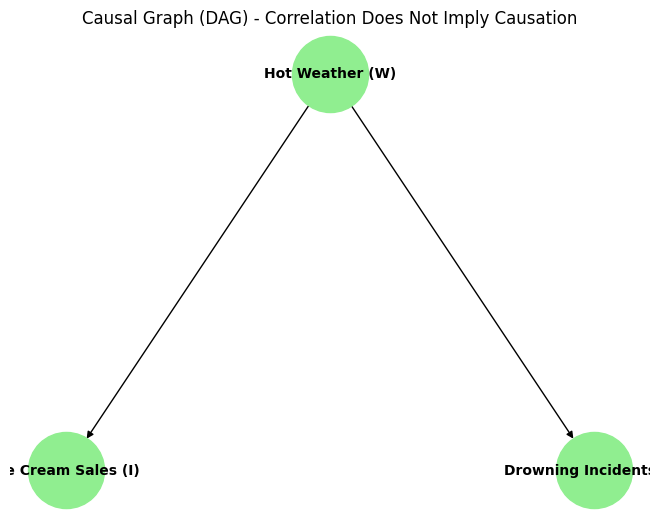

In [23]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Hot Weather (W)")
G.add_node("Ice Cream Sales (I)")
G.add_node("Drowning Incidents (D)")

# Add directed edges representing causal relationships
G.add_edge("Hot Weather (W)", "Ice Cream Sales (I)")
G.add_edge("Hot Weather (W)", "Drowning Incidents (D)")

# Draw the graph
pos = {
    "Hot Weather (W)": (0, 1),
    "Ice Cream Sales (I)": (-1, 0),
    "Drowning Incidents (D)": (1, 0),
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
plt.tight_layout()

plt.title("Causal Graph (DAG) - Correlation Does Not Imply Causation")
plt.show()


Correlation between Ice Cream Sales and Drowning Incidents: 0.1812
Correlation between Ice Cream Sales and Hot Weather: 0.7026
Correlation between Drowning Incidents and Hot Weather: 0.2395

Drowning rates by Ice Cream Sales:
Ice Cream Sales
0    0.046310
1    0.152104
Name: Drowning Incidents, dtype: float64


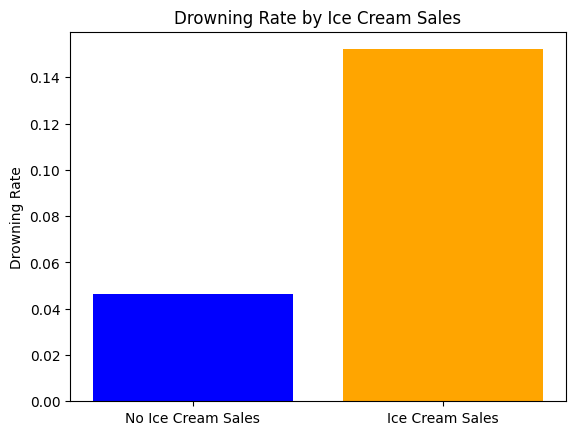

In [24]:
# Number of individuals (or time periods)
n = 1000

# Probability of hot weather
p_hot_weather = 0.3

# Ice cream sales probabilities
p_ice_cream_if_hot = 0.8
p_ice_cream_if_not_hot = 0.1

# Drowning incidents probabilities
p_drowning_if_hot = 0.2
p_drowning_if_not_hot = 0.05

# Simulate Hot Weather
np.random.seed(42)
hot_weather = np.random.binomial(1, p_hot_weather, n)

# Simulate Ice Cream Sales based on weather
ice_cream_sales = np.where(hot_weather == 1,
                           np.random.binomial(1, p_ice_cream_if_hot, n),
                           np.random.binomial(1, p_ice_cream_if_not_hot, n))

# Simulate Drowning Incidents based on weather
drowning_incidents = np.where(hot_weather == 1,
                              np.random.binomial(1, p_drowning_if_hot, n),
                              np.random.binomial(1, p_drowning_if_not_hot, n))

# Create a DataFrame for analysis
df = pd.DataFrame({
    'Hot Weather': hot_weather,
    'Ice Cream Sales': ice_cream_sales,
    'Drowning Incidents': drowning_incidents
})

# Calculate correlations
correlation_ice_drowning = df[['Ice Cream Sales', 'Drowning Incidents']].corr().iloc[0, 1]
correlation_ice_weather = df[['Ice Cream Sales', 'Hot Weather']].corr().iloc[0, 1]
correlation_drowning_weather = df[['Drowning Incidents', 'Hot Weather']].corr().iloc[0, 1]

# Print correlation results
print(f"Correlation between Ice Cream Sales and Drowning Incidents: {correlation_ice_drowning:.4f}")
print(f"Correlation between Ice Cream Sales and Hot Weather: {correlation_ice_weather:.4f}")
print(f"Correlation between Drowning Incidents and Hot Weather: {correlation_drowning_weather:.4f}")

# Grouped statistics to check rates
ice_cream_drowning_rate = df.groupby('Ice Cream Sales')['Drowning Incidents'].mean()
print("\nDrowning rates by Ice Cream Sales:")
print(ice_cream_drowning_rate)

# Plot the results
plt.bar(['No Ice Cream Sales', 'Ice Cream Sales'], ice_cream_drowning_rate, color=['blue', 'orange'])
plt.title('Drowning Rate by Ice Cream Sales')
plt.ylabel('Drowning Rate')
plt.show()


## Causation $\not\implies$ Correlation

Antihistamines causally reduce sneezing

People taking antihistamines sneeze more than average

Negative causal effect of antihistamines on sneezing but

positive correlation b/w antihistamine use and sneezing

- \(A=1\) if a person takes antihistamines, 0 otherwise.
- \(S=1\) if a person sneezes, 0 otherwise.
- \(C=1\) if a person has the underlying condition (e.g., allergies), 0 otherwise.

Assumptions:
1. \(A\) and \(S\) are dependent on \(C\), meaning:
- People with allergies \((C=1)\) are more likely to take antihistamines.
- People with allergies \((C=1)\) sneeze more frequently.
1. Negative causal effect of antihistamines: Antihistamines reduce sneezing, i.e., \(P(S=\) \(1 \mid A=1, C=1)<P(S=1 \mid A=0, C=1)\).

Model:
We can model the probability of sneezing \(S\) as a function of antihistamine use \(A\), the underlying condition \(C\), and their relationships:

$$
P(S=1 \mid A=a, C=c)=\alpha_c-\beta \cdot a
$$

where:
- \(\alpha_c\) captures the baseline sneezing rate based on the condition \(C\).
- \(\beta\) captures the reduction in sneezing due to antihistamines.

Similarly, we can model the probability of taking antihistamines as a function of the underlying condition:

$$
P(A=1 \mid C=c)=\gamma \cdot c
$$


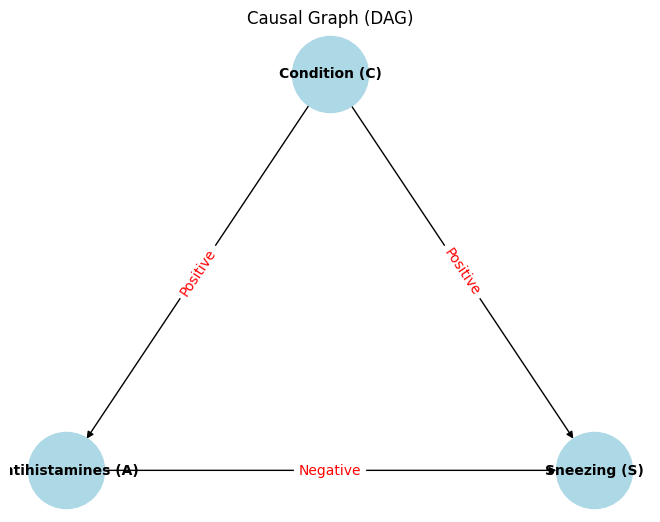

In [25]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Condition (C)")
G.add_node("Antihistamines (A)")
G.add_node("Sneezing (S)")

# Add directed edges representing causal relationships
G.add_edge("Condition (C)", "Antihistamines (A)")
G.add_edge("Condition (C)", "Sneezing (S)")
G.add_edge("Antihistamines (A)", "Sneezing (S)")

# Draw the graph
pos = {
    "Condition (C)": (0, 1),
    "Antihistamines (A)": (-1, 0),
    "Sneezing (S)": (1, 0),
}

labels = {
    ("Condition (C)", "Antihistamines (A)"): "Positive",
    ("Condition (C)", "Sneezing (S)"): "Positive",
    ("Antihistamines (A)", "Sneezing (S)"): "Negative",
}

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")

plt.title("Causal Graph (DAG)")
plt.show()


Correlation between antihistamine use and sneezing: 0.2137

Average sneezing rates:
Antihistamines
0    0.112332
1    0.309392
Name: Sneezing, dtype: float64


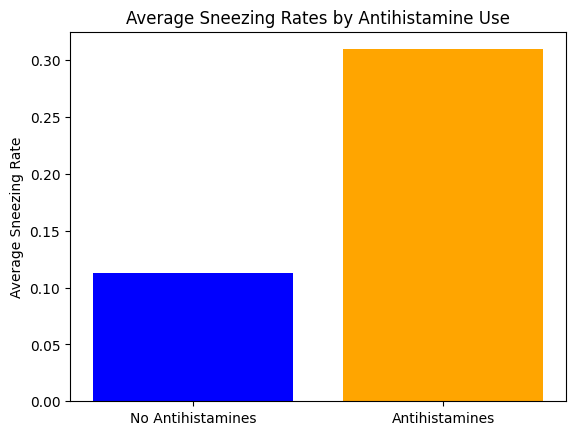

In [26]:
# Number of individuals
n = 1000

# Parameters
p_condition = 0.2  # Probability of having the underlying condition (allergies)
alpha_c1 = 0.8     # Sneezing rate with condition and without antihistamines
alpha_c0 = 0.1     # Sneezing rate without condition
beta = 0.5         # Effect of antihistamines on sneezing
gamma = 0.9        # Probability of taking antihistamines with the condition

# Simulate data
np.random.seed(42)
C = np.random.binomial(1, p_condition, n)  # Condition presence
A = np.random.binomial(1, gamma * C)       # Antihistamine use based on condition

# Sneezing probability based on condition and antihistamine use
sneezing_prob = np.where(C == 1, alpha_c1 - beta * A, alpha_c0)
S = np.random.binomial(1, sneezing_prob)  # Sneezing occurrences

# Create a DataFrame for analysis
df = pd.DataFrame({'Condition': C, 'Antihistamines': A, 'Sneezing': S})

# Calculate correlations
correlation = df[['Antihistamines', 'Sneezing']].corr().iloc[0, 1]

# Print results
print(f"Correlation between antihistamine use and sneezing: {correlation:.4f}")

# Grouped statistics to check average sneezing rates
sneezing_rates = df.groupby('Antihistamines')['Sneezing'].mean()
print("\nAverage sneezing rates:")
print(sneezing_rates)

# Plot the results
plt.bar(['No Antihistamines', 'Antihistamines'], sneezing_rates, color=['blue', 'orange'])
plt.title('Average Sneezing Rates by Antihistamine Use')
plt.ylabel('Average Sneezing Rate')
plt.show()

## Conditional Distribution

$$
\mathbb{E}\left[Y \mid X=x_i\right]=\sum_{j=1}^k y_j P\left(Y=y_j \mid X=x_i\right)
$$

$$
\mathbb{E}[Y \mid X=x]=\int_{-\infty}^{\infty} y f(y \mid x) d y
$$

1. $E[g(X) + h(X)Y \mid X] = g(X) + h(X)E[Y \mid X]$

2. $E[Y + Z \mid X] = E[Y \mid X] + E[Z \mid X]$

3. If $Y \leq Z$ (always), then $E[Y \mid X] \leq E[Z \mid X]$

Recall: 

+ $\mathbb{E}$ is a linear operator

## Law of Iterated Expectations


$$\mathbb{E}[X]=\mathbb{E}[\mathbb{E}[X \mid Y]]$$

Trivial Proof:

\begin{align}
\mathbb{E}[\mathbb{E}(X \mid Y)] & =\mathbb{E}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y)\right] \\
& =\sum_{y \in \mathcal{Y}}\left[\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x \mid Y=y)\right] \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x \mid Y=y) \cdot \operatorname{Pr}(Y=y) \\
& =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} x \cdot \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \sum_{y \in \mathcal{Y}} \operatorname{Pr}(X=x, Y=y) \\
& =\sum_{x \in \mathcal{X}} x \cdot \operatorname{Pr}(X=x) \\
& =\mathbb{E}(X)
\end{align}
